In [5]:
import pandas as pd
import matplotlib.pyplot as plt

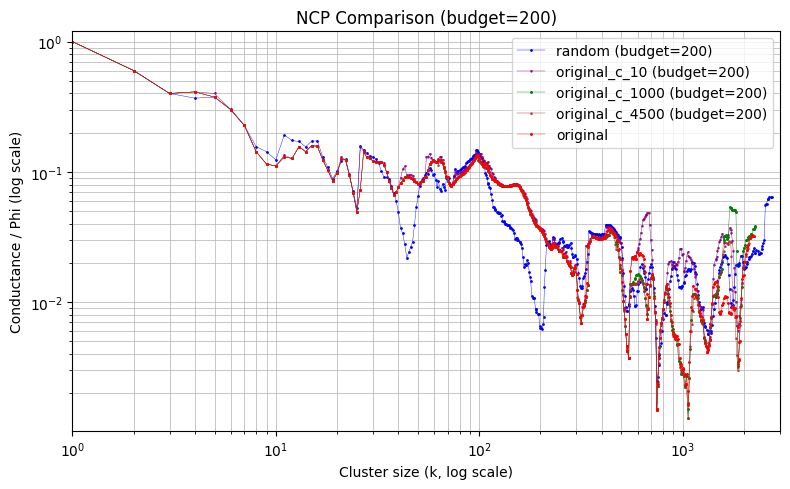

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define budgets and files
# budgets = [100, 200, 500]
budgets = [200]
methods = {
    "random": "../target/ncp_plots/facebook/random/ncp.facebook_random_{}.tab",
    # "wncp_strict": "../target/ncp_plots/facebook/strict/ncp.facebook_wncp_{}.tab",
    # "wncp_to_random_point": "../target/ncp_plots/facebook/fallback/ncp.facebook_fallback_wncp_{}.tab",
    "original_c_10": "../datasets/facebook/ncp_original_graph/ncp.facebook_combined.tab",
    "original_c_1000": "../datasets/facebook/ncp.facebook_combined_c1000.tab",
    "original_c_4500": "../datasets/facebook/ncp.facebook_combined_c4500.tab",
    # "wncp_to_random_point_recursive": "../target/ncp_plots/facebook/recursive_wncp/fallback/ncp.facebook_fallback_wncp_{}.tab",
    # "wncp_strict_recursive": "../target/ncp_plots/facebook/recursive_wncp/strict/ncp.facebook_strict_wncp_{}.tab"
}
colors = {
    "random": "blue",
    # "wncp_strict": "orange",
    # "wncp_to_random_point": "green",
    "original_c_10": "purple",
    "original_c_1000": "green",
    "original_c_4500": "brown",
    # "wncp_strict_recursive": "brown"
}

markers = {
    "random": "o",
    # "wncp_strict": "s",
    # "wncp_to_random_point": "^",
    "original_c_10": "v",
    "original_c_1000": "D",
    "original_c_4500": "^"
}
# ✅ Load the original curve once
# original_path = "../datasets/facebook/ncp_original_graph/ncp.facebook_combined.tab"
original_path = "../datasets/facebook/ncp.facebook_combined.tab"

df_original = pd.read_csv(original_path, sep="\t", comment="#", header=None, names=["k", "phi"])

for budget in budgets:
    plt.figure(figsize=(8, 5))
    
    # Collect all dataframes for this budget
    dfs = {}
    for method, path_template in methods.items():
        path = path_template.format(budget)
        dfs[method] = pd.read_csv(path, sep="\t", comment="#", header=None, names=["k", "phi"])
        
        plt.plot(dfs[method]["k"], dfs[method]["phi"],
                 marker=markers[method],
                 label=f"{method} (budget={budget})",
                 linewidth=0.3, markersize=1,
                 color=colors[method])
    
    # # ✅ Add the original curve (always the same)
    # plt.plot(df_original["k"], df_original["phi"],
    #          label="original",
    #          color="red", linewidth=0.3, markersize=3 )#linestyle="--", linewidth=1.2)
    plt.plot(df_original["k"], df_original["phi"],
         label="original",
         marker='D',         # choose a marker style, e.g., diamond
         linewidth=0.3,      # line thickness
         markersize=1,       # marker size
         color="red")

    # Compute global min/max for this budget (including original curve!)
    k_min = min([df["k"].min() for df in dfs.values()] + [df_original["k"].min()])
    k_max = max([df["k"].max() for df in dfs.values()] + [df_original["k"].max()])
    phi_min = min([df["phi"].min() for df in dfs.values()] + [df_original["phi"].min()])
    phi_max = max([df["phi"].max() for df in dfs.values()] + [df_original["phi"].max()])

    # Logarithmic axes with safe ranges
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1, k_max * 1.1)
    plt.ylim(phi_min * 0.8, phi_max * 1.2)
    
    plt.xlabel("Cluster size (k, log scale)")
    plt.ylabel("Conductance / Phi (log scale)")
    plt.title(f"NCP Comparison (budget={budget})")
    plt.legend()
    plt.grid(True, which="both", linewidth=0.5)
    plt.tight_layout()
    plt.show()


In [5]:
k_max

np.float64(nan)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace these with your actual file paths
files = [file1[0], file2[0], file3[0]]
labels = [file1[1], file2[1], file3[1]]
markers = ['o', 's', '^']
colors = ['blue', 'green', 'red']  # for curves and shading

dfs = [pd.read_csv(f, sep="\t", comment="#", header=None, names=["k", "phi"]) for f in files]

# 1️⃣ Plot NCP curves (log-log) with mean ± std shading
plt.figure(figsize=(8, 5))
for df, label, marker, color in zip(dfs, labels, markers, colors):
    mean_phi = np.mean(df["phi"])
    std_phi = np.std(df["phi"])
    plt.plot(df["k"], df["phi"], marker=marker, linewidth=0.8, markersize=3, label=label, color=color)
    # Shade mean ± std
    plt.fill_between(df["k"], mean_phi - std_phi, mean_phi + std_phi, color=color, alpha=0.1)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Cluster size (k, log scale)")
plt.ylabel("Conductance / Phi (log scale)")
plt.title("NCP Comparison with Flatness Shading")
plt.grid(True, which="both", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# 2️⃣ Compute metrics for each file
summary = []
for label, df in zip(labels, dfs):
    avg_phi = np.mean(df["phi"])
    auc = np.trapz(df["phi"], df["k"])
    std_phi = np.std(df["phi"])
    cv_phi = std_phi / avg_phi
    summary.append([label, avg_phi, auc, std_phi, cv_phi])

summary_df = pd.DataFrame(summary, columns=["File", "Avg Phi", "AUC", "Std Phi", "CV"])
print("\nSummary Table:")
print(summary_df)

# 3️⃣ Bar chart: AUC (magnitude) vs CV (flatness)
x = np.arange(len(labels))
width = 0.35

fig, ax1 = plt.subplots(figsize=(8,5))

# AUC bars
ax1.bar(x - width/2, summary_df["AUC"], width, label="AUC (magnitude)", color='skyblue')
ax1.set_ylabel("AUC (higher = better overall)")

# CV bars on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(x + width/2, summary_df["CV"], width, label="CV (flatness)", color='salmon')
ax2.set_ylabel("Coefficient of Variation (lower = flatter)")

# X-axis labels
plt.xticks(x, labels)
ax1.set_title("NCP Magnitude vs Flatness Comparison")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


ValueError: Invalid file path or buffer object type: <class 'tuple'>